Missing Values:
 supplier_rating          0
supplier_lead_time       0
shipment_mode            0
shipping_distance_km     0
order_quantity           0
unit_price               0
total_order_value        0
weather_condition        0
region                   0
holiday_period           0
previous_on_time_rate    0
on_time_delivery         0
delivery_duration        0
order_weekday            0
order_month              0
dtype: int64


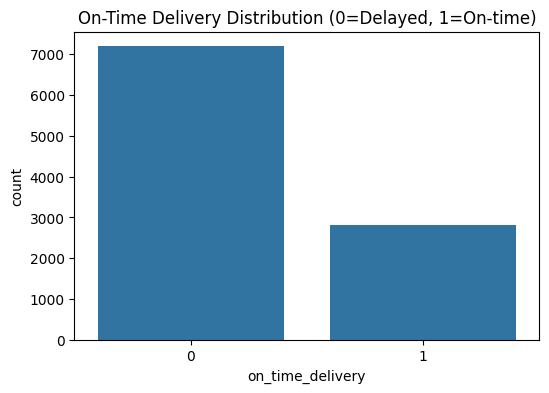


Numeric Columns Summary:

       supplier_rating  supplier_lead_time  shipping_distance_km  \
count     10000.000000        10000.000000          10000.000000   
mean          3.751450            5.978100            760.658900   
std           0.724811            2.578776            430.365427   
min           2.500000            2.000000             10.000000   
25%           3.100000            4.000000            391.000000   
50%           3.700000            6.000000            759.000000   
75%           4.400000            8.000000           1136.000000   
max           5.000000           10.000000           1500.000000   

       order_quantity    unit_price  total_order_value  previous_on_time_rate  \
count    10000.000000  10000.000000       10000.000000           10000.000000   
mean        50.356500   2553.048149      128430.393828              85.003950   
std         28.721652   1406.806261      109216.464845               8.716881   
min          1.000000    100.530000 

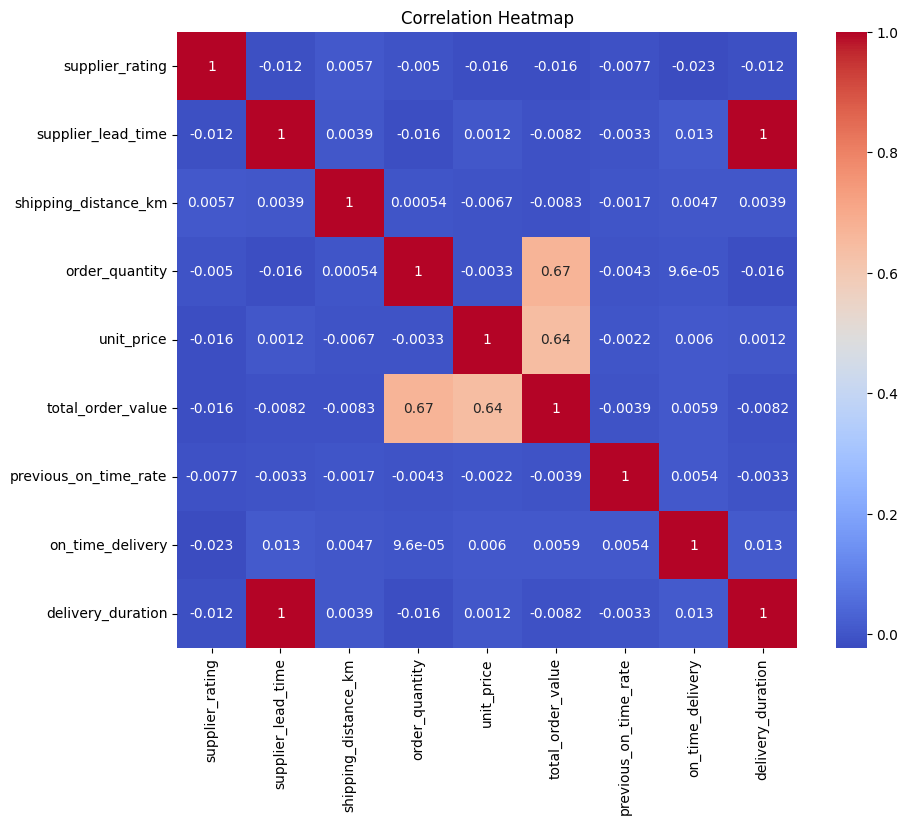

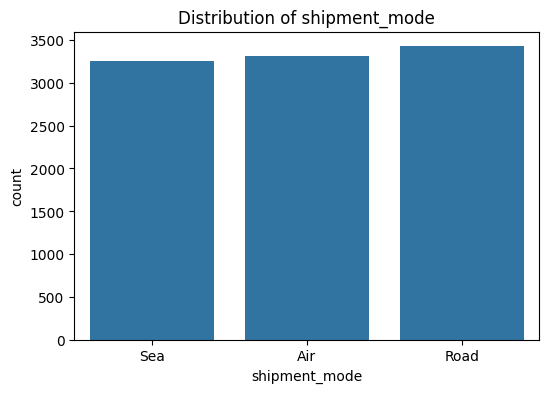

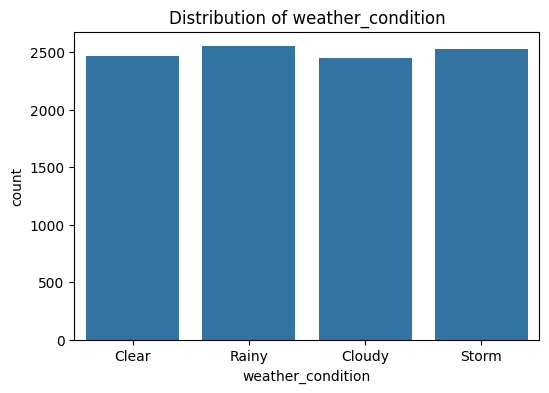

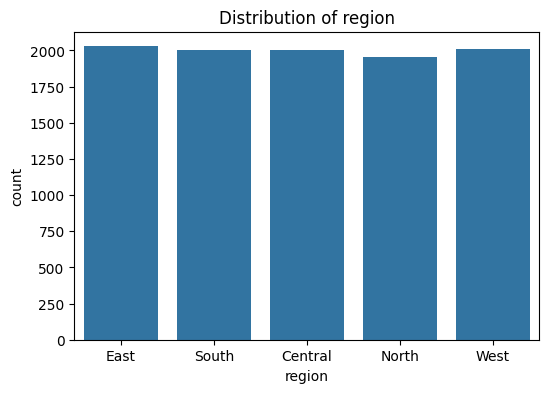

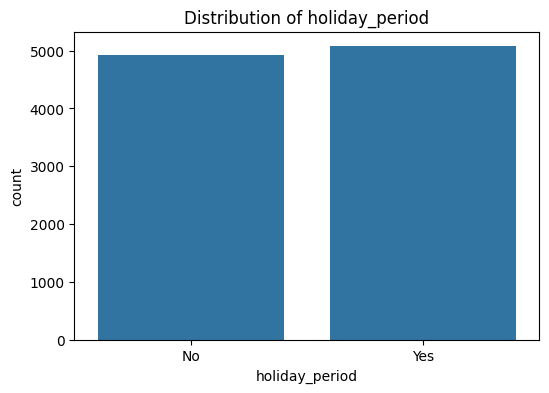

In [1]:
# ======================
# IMPORTS
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# LOAD DATASET
# ======================
df = pd.read_excel("shipment_dataset_10000.xlsx")

# ======================
# PREPROCESSING
# ======================

# ---- Drop useless columns ----
df_prep = df.drop(columns=[
    'order_id', 'supplier_id', 'actual_delivery_date',
    'delayed_reason_code', 'carrier_name'
])

# ---- Handle date columns ----
df_prep['order_date'] = pd.to_datetime(df_prep['order_date'])
df_prep['promised_delivery_date'] = pd.to_datetime(df_prep['promised_delivery_date'])

# ---- Create new features ----
df_prep['delivery_duration'] = (df_prep['promised_delivery_date'] - df_prep['order_date']).dt.days
df_prep['order_weekday'] = df_prep['order_date'].dt.dayofweek
df_prep['order_month'] = df_prep['order_date'].dt.month

# Drop original date columns
df_prep = df_prep.drop(columns=['order_date', 'promised_delivery_date'])

# ---- Check for missing values ----
print("Missing Values:\n", df_prep.isnull().sum())

# ======================
# EDA - Exploratory Data Analysis
# ======================

# ---- Target distribution ----
plt.figure(figsize=(6,4))
sns.countplot(x='on_time_delivery', data=df_prep)
plt.title("On-Time Delivery Distribution (0=Delayed, 1=On-time)")
plt.show()

# ---- Numeric Features Summary ----
numeric_cols = df_prep.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nNumeric Columns Summary:\n")
print(df_prep[numeric_cols].describe())

# ---- Correlation Heatmap ----
plt.figure(figsize=(10,8))
sns.heatmap(df_prep[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ---- Categorical Features Distribution ----
categorical_cols = df_prep.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_prep)
    plt.title(f"Distribution of {col}")
    plt.show()


In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel("shipment_dataset_10000.xlsx")

# Convert date columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['promised_delivery_date'] = pd.to_datetime(df['promised_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])

# -------- Feature Engineering --------

# 1. Delivery Duration (Promised Delivery Date - Order Date)
df['delivery_duration'] = (df['promised_delivery_date'] - df['order_date']).dt.days

# 2. Order Weekday (Day of week when order was placed)
df['order_weekday'] = df['order_date'].dt.weekday  # 0=Monday, 6=Sunday

# 3. Order Month
df['order_month'] = df['order_date'].dt.month

# -------- Drop unused columns --------
drop_cols = ['order_id', 'supplier_id', 'carrier_name', 'delayed_reason_code',
             'order_date', 'promised_delivery_date', 'actual_delivery_date']
df = df.drop(columns=drop_cols)

# -------- Check new dataset --------
print(df.head())
print("\nColumns now:", df.columns.tolist())


   supplier_rating  supplier_lead_time shipment_mode  shipping_distance_km  \
0              3.4                  10           Sea                    51   
1              4.3                  10           Sea                   373   
2              3.2                   5           Sea                  1304   
3              3.9                   7           Air                   839   
4              3.2                   8           Sea                   258   

   order_quantity  unit_price  total_order_value weather_condition   region  \
0              48     2153.91          103387.68             Clear     East   
1              91      405.36           36887.76             Rainy     East   
2              25     3241.41           81035.25            Cloudy    South   
3              71      365.79           25971.09             Rainy  Central   
4               9     3052.84           27475.56            Cloudy     East   

  holiday_period  previous_on_time_rate  on_time_deliver

In [3]:
import pandas as pd
import numpy as np

# ======================
# LOAD DATASET
# ======================
df = pd.read_excel("shipment_dataset_10000.xlsx")

# ======================
# DATE HANDLING
# ======================
df['order_date'] = pd.to_datetime(df['order_date'])
df['promised_delivery_date'] = pd.to_datetime(df['promised_delivery_date'])
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])

# ======================
# FEATURE ENGINEERING
# ======================

# 1. Delivery Duration (Promised - Order)
df['delivery_duration'] = (df['promised_delivery_date'] - df['order_date']).dt.days

# 2. Order Weekday (0=Monday, 6=Sunday)
df['order_weekday'] = df['order_date'].dt.weekday

# 3. Order Month
df['order_month'] = df['order_date'].dt.month

# 4. Promised Lead Time (Promised - Order in days)
df['promised_lead_time'] = (df['promised_delivery_date'] - df['order_date']).dt.days

# 5. Weekend Flag (1 if order placed on Sat/Sun)
df['is_weekend_order'] = df['order_weekday'].isin([5,6]).astype(int)

# 6. Cost-to-Weight Ratio (if both columns exist)
if 'total_order_value' in df.columns and 'shipping_distance_km' in df.columns:
    df['cost_to_distance_ratio'] = df['total_order_value'] / (df['shipping_distance_km'] + 1)

# 7. Discount Intensity (if discount column exists)
if 'discount' in df.columns and 'total_order_value' in df.columns:
    df['discount_intensity'] = df['discount'] / (df['total_order_value'] + 1)

# 8. Interaction: Shipment Mode × Distance
if 'shipment_mode' in df.columns and 'shipping_distance_km' in df.columns:
    df['mode_distance_interaction'] = df['shipment_mode'].astype(str) + "_" + pd.cut(
        df['shipping_distance_km'],
        bins=[0, 100, 500, 1000, np.inf],
        labels=['short','medium','long','very_long']
    ).astype(str)

# 9. Holiday × Region Interaction
if 'holiday_period' in df.columns and 'region' in df.columns:
    df['holiday_region'] = df['holiday_period'].astype(str) + "_" + df['region'].astype(str)

# ======================
# DROP LEAKAGE / ID COLUMNS
# ======================
drop_cols = [
    'order_id','supplier_id','carrier_name',
    'delayed_reason_code','order_date',
    'promised_delivery_date','actual_delivery_date'
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# ======================
# CHECK RESULT
# ======================
print("Final feature set:\n", df.columns.tolist())
print(df.head())

Final feature set:
 ['supplier_rating', 'supplier_lead_time', 'shipment_mode', 'shipping_distance_km', 'order_quantity', 'unit_price', 'total_order_value', 'weather_condition', 'region', 'holiday_period', 'previous_on_time_rate', 'on_time_delivery', 'delivery_duration', 'order_weekday', 'order_month', 'promised_lead_time', 'is_weekend_order', 'cost_to_distance_ratio', 'mode_distance_interaction', 'holiday_region']
   supplier_rating  supplier_lead_time shipment_mode  shipping_distance_km  \
0              3.4                  10           Sea                    51   
1              4.3                  10           Sea                   373   
2              3.2                   5           Sea                  1304   
3              3.9                   7           Air                   839   
4              3.2                   8           Sea                   258   

   order_quantity  unit_price  total_order_value weather_condition   region  \
0              48     2153.91     

In [11]:
# Define features and target
#X = df.drop('on_time_delivery', axis=1)
#y = df['on_time_delivery']

# Now you can check distribution
print(y.value_counts(normalize=True))

on_time_delivery
0    0.7196
1    0.2804
Name: proportion, dtype: float64


In [12]:
import numpy as np
import pandas as pd

# --- Step 1: Encode categorical columns safely ---
df['shipment_mode_code'] = df['shipment_mode'].astype('category').cat.codes
df['region_code'] = df['region'].astype('category').cat.codes
df['holiday_code'] = df['holiday_period'].astype('category').cat.codes
df['weather_code'] = df['weather_condition'].astype('category').cat.codes

# --- Step 2: Derived Features ---

# Efficiency ratios
df['value_per_unit'] = df['total_order_value'] / (df['order_quantity']+1)
df['distance_per_day'] = df['shipping_distance_km'] / (df['delivery_duration']+1)
df['cost_per_km'] = df['total_order_value'] / (df['shipping_distance_km']+1)

# Interaction features
df['supplier_lead_vs_duration'] = df['supplier_lead_time'] / (df['delivery_duration']+1)
df['rating_vs_lead'] = df['supplier_rating'] * df['supplier_lead_time']
df['quantity_price_interaction'] = df['order_quantity'] * df['unit_price']
df['mode_vs_distance'] = df['shipping_distance_km'] * df['shipment_mode_code']

# Seasonal cyclic encodings
df['month_sin'] = np.sin(2 * np.pi * df['order_month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['order_month']/12)
df['weekday_sin'] = np.sin(2 * np.pi * df['order_weekday']/7)
df['weekday_cos'] = np.cos(2 * np.pi * df['order_weekday']/7)

# Seasonal effects
df['month_vs_quantity'] = df['order_month'] * df['order_quantity']
df['weekday_vs_quantity'] = df['order_weekday'] * df['order_quantity']

# Reliability signals
df['combined_reliability'] = df['supplier_rating'] * df['previous_on_time_rate']
df['distance_adjusted_reliability'] = df['combined_reliability'] / (df['shipping_distance_km']+1)

# Risk indices
df['supplier_risk_index'] = (1 - df['supplier_rating']) * df['supplier_lead_time']
df['holiday_flag'] = (df['holiday_code'] > 0).astype(int)
df['weather_severity'] = df['weather_code']

# Delay ratios
df['delay_ratio'] = df['delivery_duration'] / (df['supplier_lead_time']+1)
df['lead_time_ratio'] = df['supplier_lead_time'] / (df['order_quantity']+1)

# Composite urgency/reliability
df['urgency_score'] = (df['order_quantity'] / (df['supplier_lead_time']+1)) * (1 / (df['delivery_duration']+1))
df['value_vs_duration'] = df['total_order_value'] / (df['delivery_duration']+1)
df['quantity_vs_distance'] = df['order_quantity'] / (df['shipping_distance_km']+1)

# Weekend effect
df['is_weekend_order'] = df['order_weekday'].isin([5,6]).astype(int)

# Region-mode combined categorical (numeric form)
df['region_mode_code'] = (df['region_code'].astype(str) + "_" + df['shipment_mode_code'].astype(str)).astype('category').cat.codes

# Polynomial features
df['supplier_rating_sq'] = df['supplier_rating']**2
df['distance_sq'] = df['shipping_distance_km']**2
df['order_quantity_sq'] = df['order_quantity']**2

# Log transforms
df['log_distance'] = np.log1p(df['shipping_distance_km'])
df['log_order_value'] = np.log1p(df['total_order_value'])
df['log_lead_time'] = np.log1p(df['supplier_lead_time'])

# --- Step 3: Target cleanup ---
df = df.dropna(subset=['on_time_delivery'])
df['on_time_delivery'] = df['on_time_delivery'].astype(int)

print("Feature engineering complete. Shape:", df.shape)

Feature engineering complete. Shape: (10000, 54)


In [6]:
print(df.columns)

Index(['supplier_rating', 'supplier_lead_time', 'shipment_mode',
       'shipping_distance_km', 'order_quantity', 'unit_price',
       'total_order_value', 'weather_condition', 'region', 'holiday_period',
       'previous_on_time_rate', 'on_time_delivery', 'delivery_duration',
       'order_weekday', 'order_month', 'promised_lead_time',
       'is_weekend_order', 'cost_to_distance_ratio',
       'mode_distance_interaction', 'holiday_region', 'shipment_mode_code',
       'region_code', 'holiday_code', 'weather_code', 'value_per_unit',
       'distance_per_day', 'cost_per_km', 'supplier_lead_vs_duration',
       'rating_vs_lead', 'quantity_price_interaction', 'mode_vs_distance',
       'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
       'month_vs_quantity', 'weekday_vs_quantity', 'combined_reliability',
       'distance_adjusted_reliability', 'supplier_risk_index', 'holiday_flag',
       'weather_severity', 'delay_ratio', 'lead_time_ratio', 'urgency_score',
       'value_vs_du

In [15]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in ['mode_distance_interaction', 'holiday_region']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Target
y = df_encoded['on_time_delivery']

# Features
X_encoded = df_encoded.drop('on_time_delivery', axis=1)

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_encoded, y)

print("Resampled distribution:\n", pd.Series(y_res).value_counts())
print("Resampled distribution (normalized):\n", pd.Series(y_res).value_counts(normalize=True))

ValueError: could not convert string to float: 'Sea'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='f1')
print("Random Forest F1 scores across folds:", scores)
print("Average F1:", scores.mean())

Random Forest F1 scores across folds: [0.02739726 0.25236167 0.98440472 0.99157088 0.98440472]
Average F1: 0.6480278496317823


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_res, y_res, cv=cv, scoring='f1')

print("Random Forest F1 scores across folds:", scores)
print("Average F1:", scores.mean())

Random Forest F1 scores across folds: [0.78236398 0.77504726 0.78611632 0.74224806 0.7728558  0.77673546
 0.77388836 0.76850095 0.79030755 0.75980861]
Average F1: 0.7727872350690459


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # only test 20 random combos
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_res, y_res)
print("Best params:", rand_search.best_params_)
print("Best F1:", rand_search.best_score_)

Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best F1: 0.6480278496317823


Accuracy: 0.8162162162162162
Precision: 0.9927797833935018
Recall: 0.637065637065637
F1 Score: 0.7761053621825024
ROC-AUC: 0.8223693743384863
Confusion Matrix:
 [[1289    6]
 [ 470  825]]


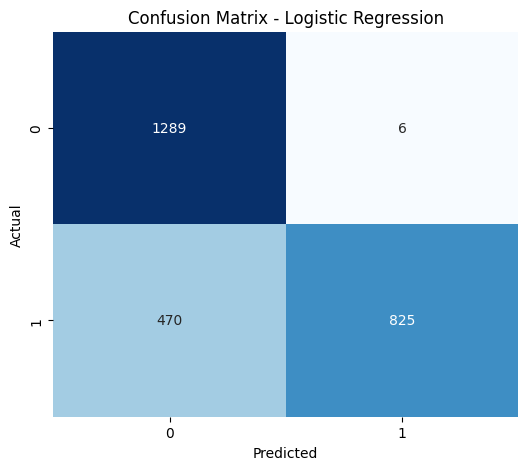

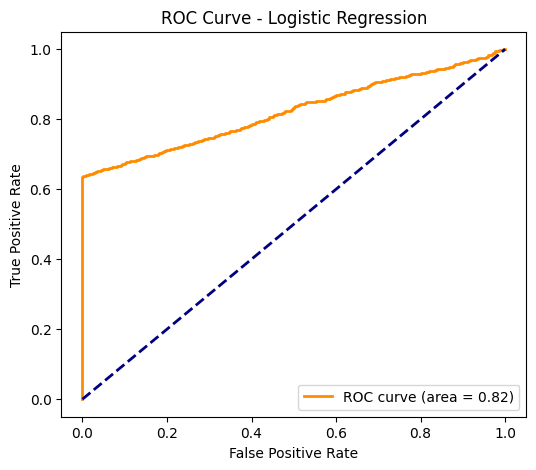

C:\Users\chenn\AppData\Local\Temp\ipykernel_24192\3650204912.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


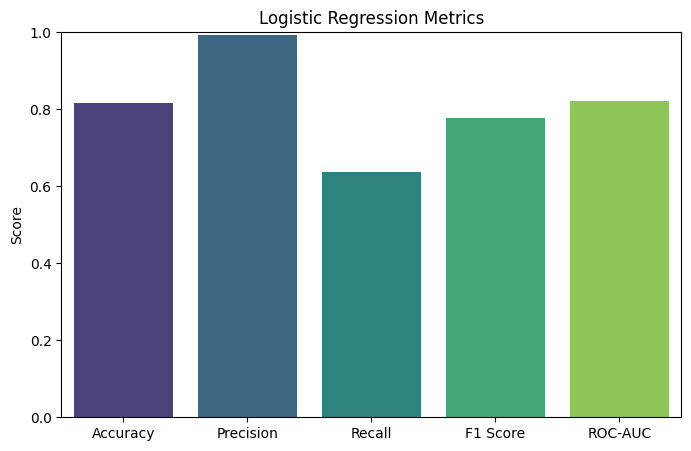

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# -----------------------------
# 1. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# -----------------------------
# 2. Logistic Regression with Scaling
# -----------------------------
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, class_weight='balanced', solver='lbfgs'))
])

log_reg.fit(X_train, y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
y_probs_lr = log_reg.predict_proba(X_test)[:,1]
y_pred_lr = log_reg.predict(X_test)

# -----------------------------
# 4. Metrics
# -----------------------------
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_probs_lr)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# -----------------------------
# 5. Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc_val:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# 7. Metrics Bar Plot
# -----------------------------
metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "ROC-AUC": roc_auc
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0,1)
plt.title("Logistic Regression Metrics")
plt.ylabel("Score")
plt.show()

Accuracy: 0.7926640926640927
Precision: 0.879
Recall: 0.6787644787644788
F1 Score: 0.7660130718954249
ROC-AUC: 0.8255589511187966
Confusion Matrix:
 [[1174  121]
 [ 416  879]]


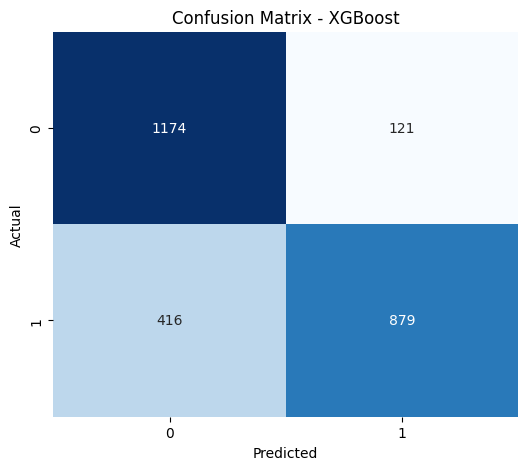

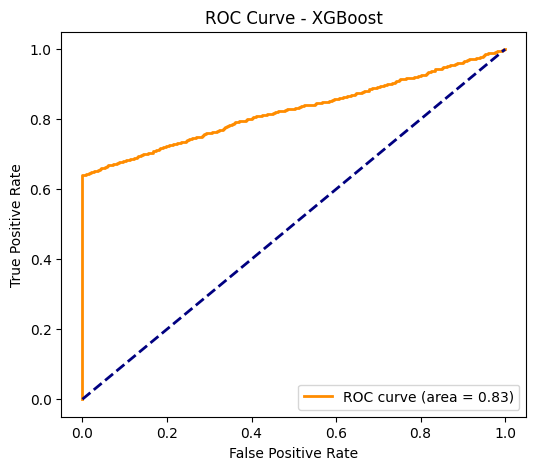

C:\Users\chenn\AppData\Local\Temp\ipykernel_24192\1358130849.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


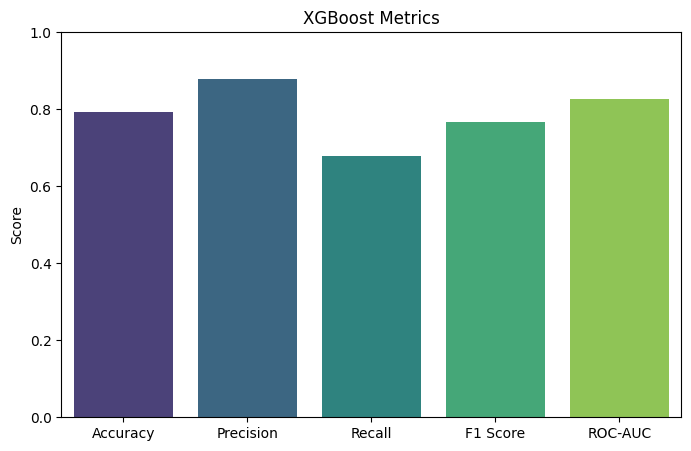

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

# -----------------------------
# 1. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# -----------------------------
# 2. Train XGBoost
# -----------------------------
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
y_probs_xgb = xgb.predict_proba(X_test)[:,1]
y_pred_xgb = xgb.predict(X_test)

# -----------------------------
# 4. Metrics
# -----------------------------
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_probs_xgb)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# -----------------------------
# 5. Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc_val:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# 7. Metrics Bar Plot
# -----------------------------
metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "ROC-AUC": roc_auc
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0,1)
plt.title("XGBoost Metrics")
plt.ylabel("Score")
plt.show()

   Metric    Value
 Accuracy 0.822780
Precision 0.986047
   Recall 0.654826
 F1 Score 0.787007
  ROC-AUC 0.854079


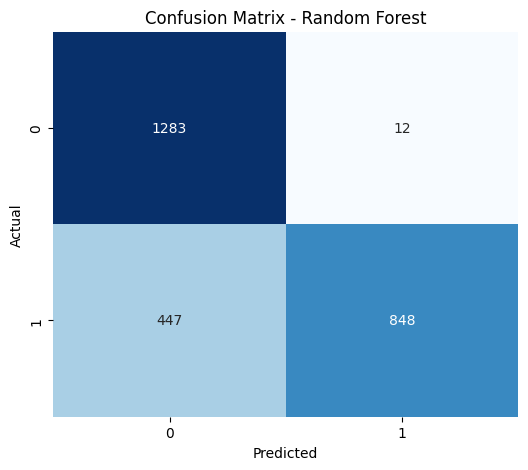

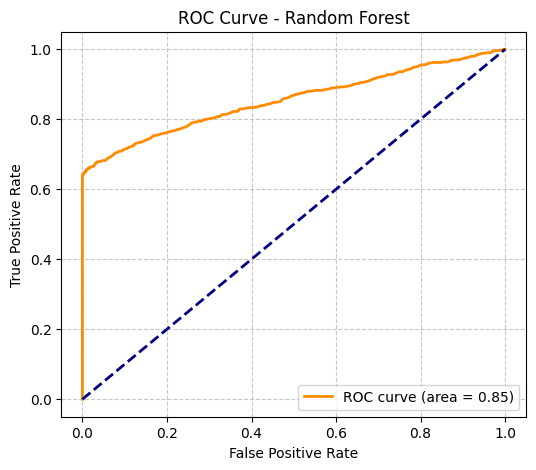

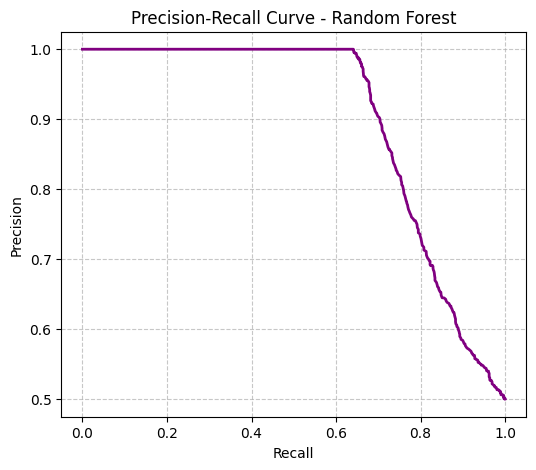

C:\Users\chenn\AppData\Local\Temp\ipykernel_24192\24890117.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


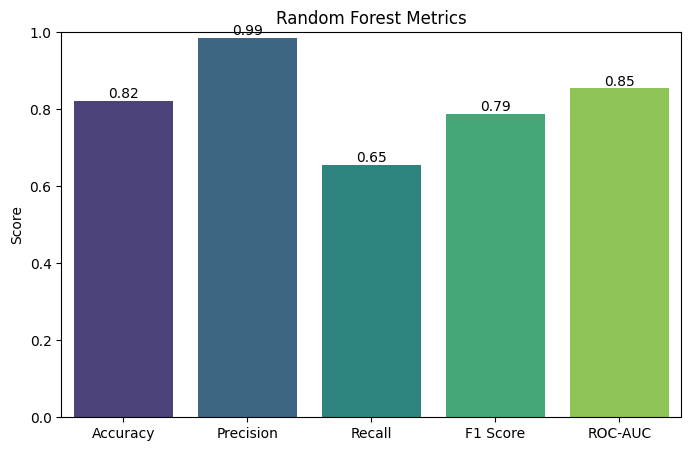

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve
)

# -----------------------------
# 1. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# -----------------------------
# 2. Final Random Forest (best params fixed)
# -----------------------------
best_rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

best_rf.fit(X_train, y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
y_probs = best_rf.predict_proba(X_test)[:,1]
y_pred = best_rf.predict(X_test)

# -----------------------------
# 4. Metrics
# -----------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Value": [acc, prec, rec, f1, roc_auc]
})
print(metrics_df.to_string(index=False))

# -----------------------------
# 5. Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc_val:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -----------------------------
# 7. Precision-Recall Curve
# -----------------------------
prec_curve, rec_curve, thresholds_pr = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(rec_curve, prec_curve, color="purple", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -----------------------------
# 8. Metrics Bar Plot (with annotations)
# -----------------------------
metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "ROC-AUC": roc_auc
}

plt.figure(figsize=(8,5))
bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0,1)
plt.title("Random Forest Metrics")
plt.ylabel("Score")

for bar, value in zip(bars.patches, metrics.values()):
    bars.annotate(f"{value:.2f}", 
                  (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color="black")

plt.show()

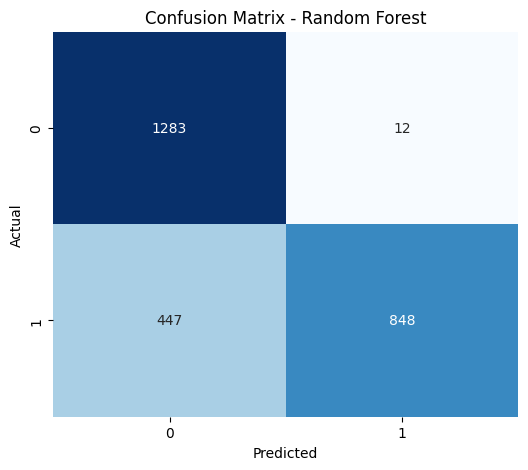

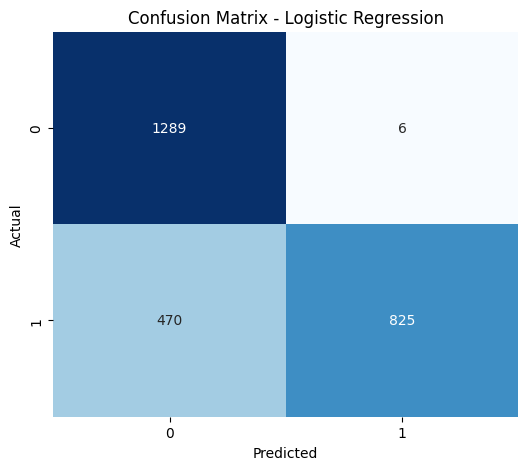

C:\Users\chenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:199: UserWarning: [19:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


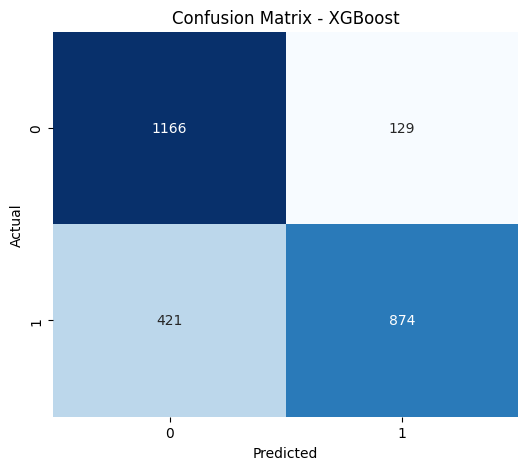


Model Comparison Results
              Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC
      Random Forest  0.822780   0.986047 0.654826  0.787007 0.854079
Logistic Regression  0.816216   0.992780 0.637066  0.776105 0.822369
            XGBoost  0.787645   0.871386 0.674903  0.760661 0.826792


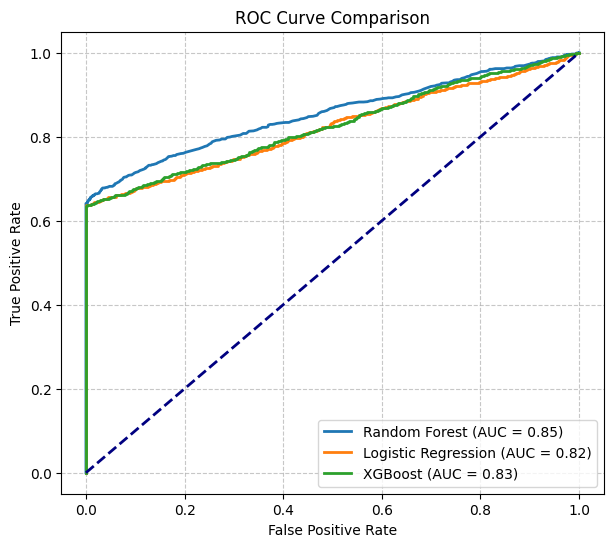

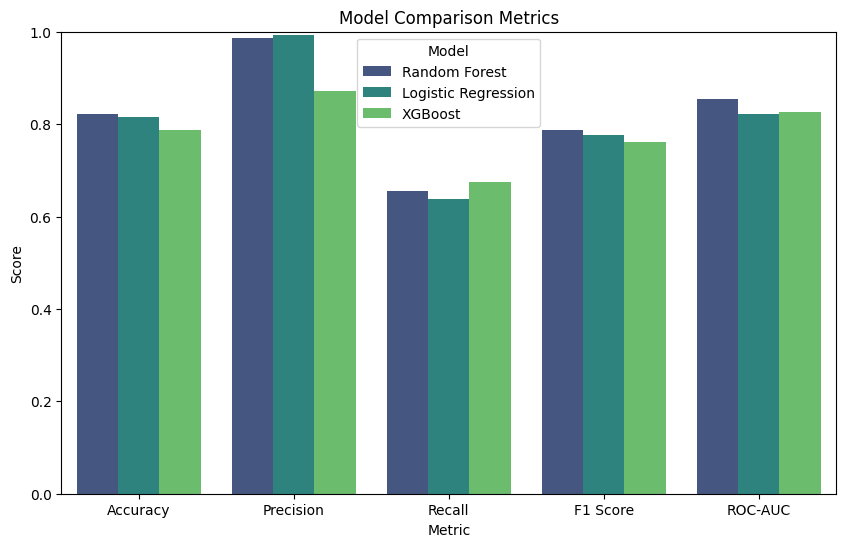


Best Model Selected (by Accuracy):
Model        Random Forest
Accuracy           0.82278
Precision         0.986047
Recall            0.654826
F1 Score          0.787007
ROC-AUC           0.854079
Name: 0, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# -----------------------------
# 1. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# -----------------------------
# 2. Define Models
# -----------------------------
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=1000, max_depth=None, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2, random_state=42
    ),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=5000, class_weight='balanced', solver='lbfgs'))
    ]),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric='logloss', random_state=42
    )
}

# -----------------------------
# 3. Train & Evaluate
# -----------------------------
results = []
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

    # Save ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_curves[name] = (fpr, tpr, roc_auc)

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -----------------------------
# 4. Results Table
# -----------------------------
results_df = pd.DataFrame(results)
print("\nModel Comparison Results")
print(results_df.to_string(index=False))

# -----------------------------
# 5. ROC Curves Comparison
# -----------------------------
plt.figure(figsize=(7,6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -----------------------------
# 6. Metrics Bar Plot
# -----------------------------
plt.figure(figsize=(10,6))
metrics_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted, palette="viridis")
plt.ylim(0,1)
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()

# -----------------------------
# 7. Select Best Model (by Accuracy)
# -----------------------------
best_model_row = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBest Model Selected (by Accuracy):")
print(best_model_row)

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf, "best_random_forest.pkl")

['best_random_forest.pkl']

In [ ]:
print(X_res.columns.tolist())

['supplier_rating', 'supplier_lead_time', 'shipping_distance_km', 'order_quantity', 'unit_price', 'total_order_value', 'previous_on_time_rate', 'delivery_duration', 'order_weekday', 'order_month', 'value_per_unit', 'distance_per_day', 'cost_per_km', 'supplier_lead_vs_duration', 'rating_vs_lead', 'quantity_price_interaction', 'mode_vs_distance', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'month_vs_quantity', 'weekday_vs_quantity', 'combined_reliability', 'distance_adjusted_reliability', 'supplier_risk_index', 'shipment_mode_code', 'region_code', 'holiday_code', 'weather_code', 'holiday_flag', 'weather_severity', 'delay_ratio', 'lead_time_ratio', 'urgency_score', 'value_vs_duration', 'quantity_vs_distance', 'is_weekend_order', 'region_mode_code', 'supplier_rating_sq', 'distance_sq', 'order_quantity_sq', 'log_distance', 'log_order_value', 'log_lead_time', 'shipment_mode_Road', 'shipment_mode_Sea', 'region_East', 'region_North', 'region_South', 'region_West', 'holiday_period_Y

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define raw input columns (the 13 user inputs)
numeric_features = [
    "supplier_rating", "supplier_lead_time", "shipping_distance_km",
    "order_quantity", "unit_price", "total_order_value",
    "previous_on_time_rate", "delivery_duration"
]

categorical_features = [
    "order_weekday", "order_month", "shipment_mode_code",
    "region_code", "holiday_code", "weather_code"
]

# Preprocessor: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Build pipeline with preprocessing + Random Forest
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", best_rf)   # your trained RandomForestClassifier
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, "shipment_pipeline.pkl")
print("✅ Pipeline saved as shipment_pipeline.pkl")

✅ Pipeline saved as shipment_pipeline.pkl
